In [2]:
!pip install Pillow


[notice] A new release of pip is available: 24.1 -> 25.1.1
[notice] To update, run: C:\Users\humkabir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


Copying Images
If you want to reassign an array to another variable, you should use the copy method.

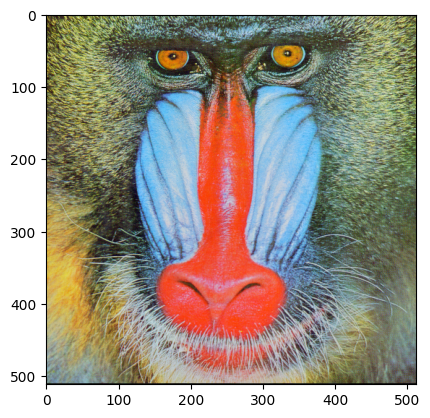

In [7]:
baboon = np.array(Image.open('baboon.png'))
plt.imshow(baboon)
plt.show()

If we do not apply the method copy(), the two variables would point to the same location in memory:

In [8]:
A = baboon

We use the id function to find a variable's memory address; we see the objects in the memory space which the variables A and baboon point to are the same.

In [9]:
id(A) == id(baboon)

True

However, if we apply method copy(), their memory addresses are different.

In [10]:
B = baboon.copy()
id(B) == id(baboon)

False

There may be unexpected behaviours when two variables point to the same object in memory. Consider the array baboon. If we set all its entries to zero, all entires in A will become zero as well. However, as baboon and B points to different objects, the values in B will not be affected.

In [11]:
baboon[:,:,] = 0

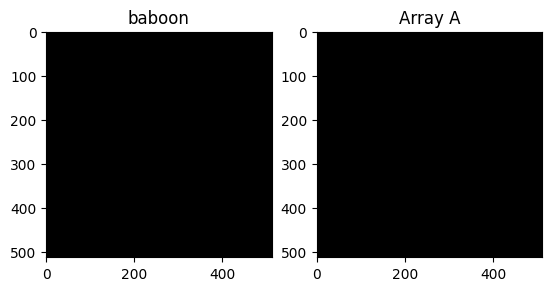

In [18]:
plt.subplot(121)
plt.imshow(baboon)
plt.title("baboon")
plt.subplot(122)
plt.imshow(A)
plt.title("Array A")
plt.show()

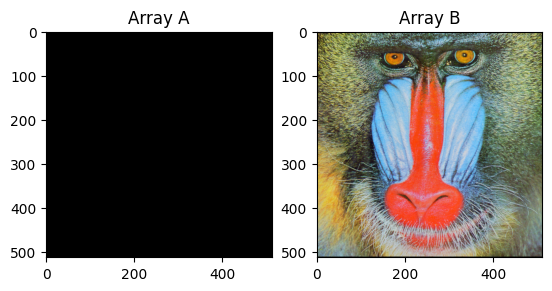

In [19]:
plt.subplot(121)
plt.imshow(A)
plt.title("Array A")

plt.subplot(122)
plt.imshow(B)
plt.title("Array B")

plt.show()

# Flipping Images

Flipping images involves reordering the indices of the pixels such that it changes the orientation of the image. Consider the following image:

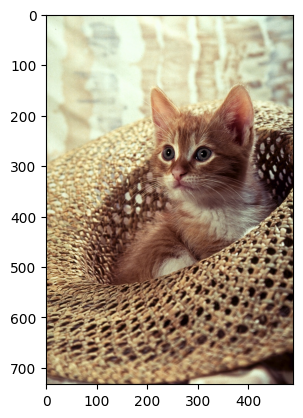

In [20]:
image = Image.open("cat.png")
plt.imshow(image)
plt.show()

In [25]:
# We can cast it to an array and find it's shape

array = np.array(image)
width, height, C = array.shape
print('width, height, C :', width, height, C)

width, height, C : 733 490 3


Let's flip, i.e rotate vertically, the image. Let's try the traditional approach. First, we create an array of the same size with datatype np.uint8.

In [26]:
# Let's Flip

array_flip = np.zeros((width, height, C), dtype=np.uint8)

We assign the first row of pixels of the original array to the new array’s last row. We repeat the process for every row, incrementing the row number from the original array and decreasing the new array’s row index to assign the pixels accordingly. After excecuting the for loop below, array_flip will become the flipped image.

In [28]:
for i, row in enumerate(array):
    array_flip[width - 1 - i, :, :] = row

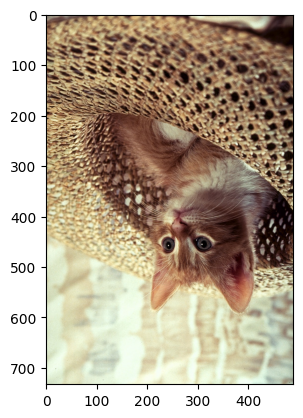

In [29]:
plt.imshow(array_flip)
plt.show()

PIL has several ways to flip an image, for example, we can use the ImageOps module:

In [30]:
from PIL import ImageOps


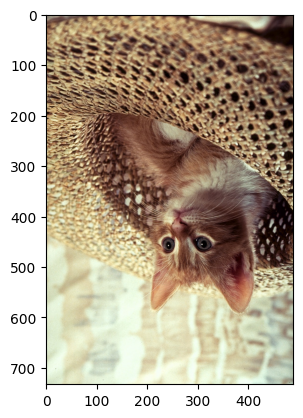

In [31]:
image_flip = ImageOps.flip(image)
plt.imshow(image_flip)
plt.show()

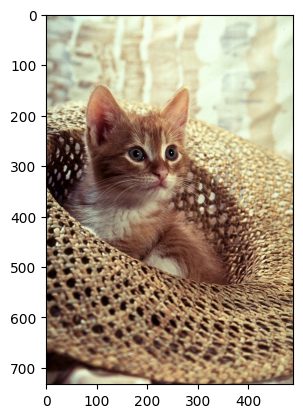

In [32]:
image_mirror = ImageOps.mirror(image)
plt.imshow(image_mirror)
plt.show()

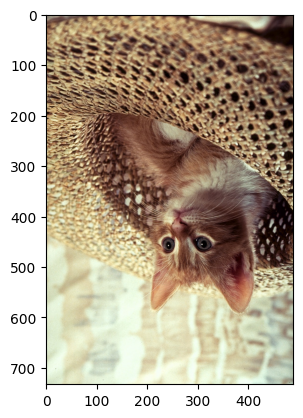

In [38]:
im_flip = image.transpose(1)
plt.imshow(im_flip)
plt.show()

The Image module has built-in attributes that describe the type of flip. The values are just integers. Several are shown in the following <code>dict</code>:


In [34]:
flip = {"FLIP_LEFT_RIGHT": Image.FLIP_LEFT_RIGHT,
        "FLIP_TOP_BOTTOM": Image.FLIP_TOP_BOTTOM,
        "ROTATE_90": Image.ROTATE_90,
        "ROTATE_180": Image.ROTATE_180,
        "ROTATE_270": Image.ROTATE_270,
        "TRANSPOSE": Image.TRANSPOSE, 
        "TRANSVERSE": Image.TRANSVERSE}

We see the values are integers.

In [35]:
flip["FLIP_LEFT_RIGHT"]

0

We can plot each of the outputs using the different parameter values:

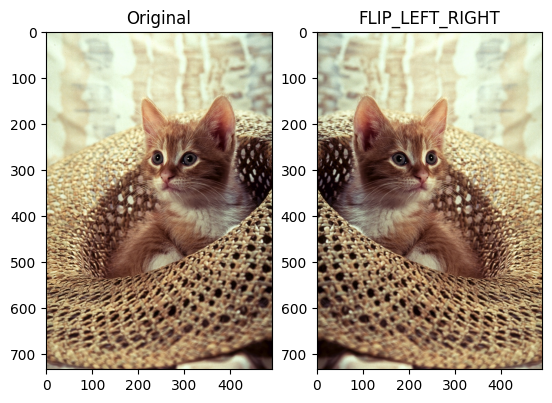

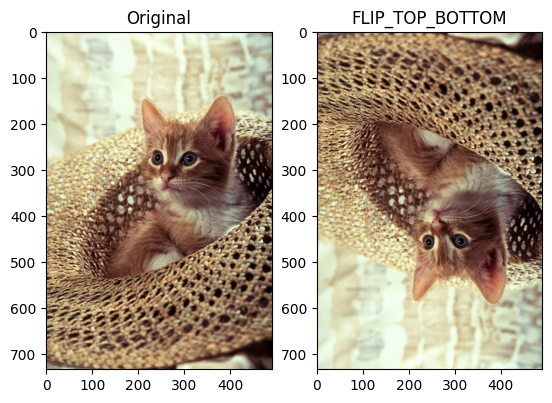

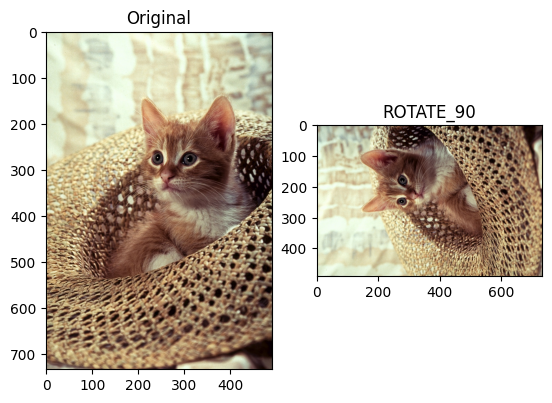

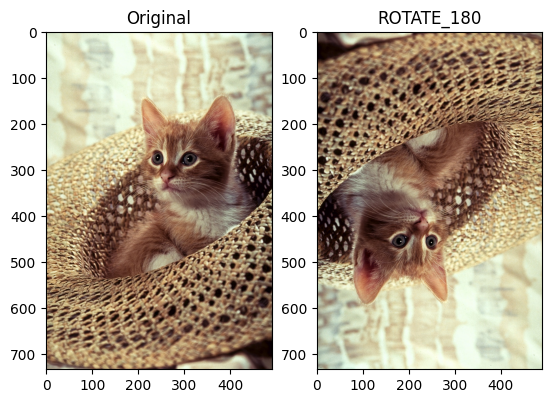

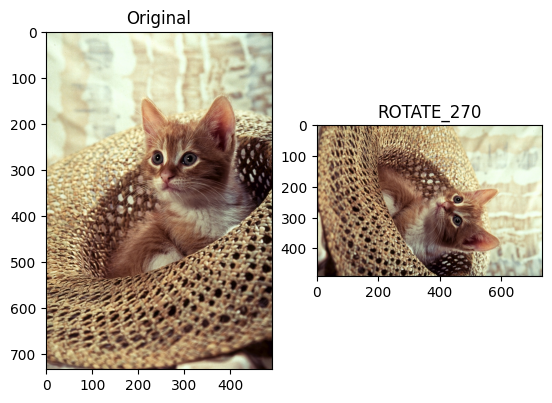

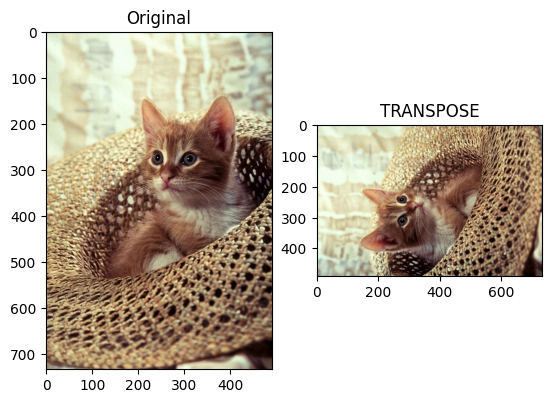

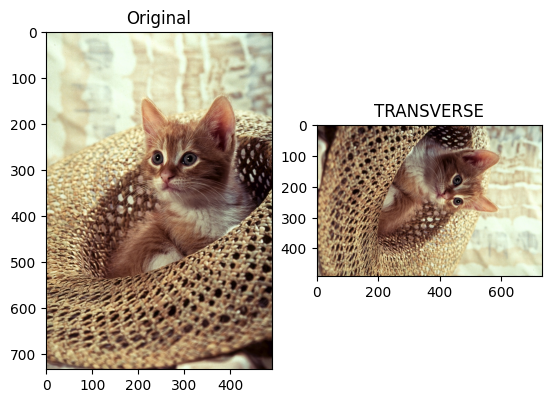

In [41]:
for key, values in flip.items():
    plt.subplot(121)
    plt.imshow(image)
    plt.title('Original')

    plt.subplot(122)
    plt.imshow(image.transpose(values))
    plt.title(key)
    
    plt.show()

# Cropping an Image

Cropping is the act of "cutting out" a part of an image and throwing out the rest. We can perform cropping using array slicing.

Let start with a vertical crop: the variable upper is the index of the first row that we would like to include in the image, the variable lower is the index of the last row we would like to include. We then perform array slicing to obtain the new image.

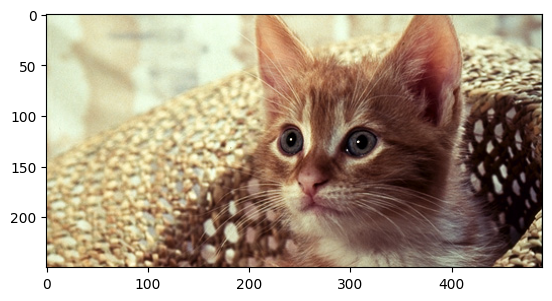

In [42]:
upper = 150
lower = 400
crop_top = array[upper: lower,:,:]
plt.imshow(crop_top)
plt.show()


Consider the array crop_top: we can also crop horizontally. The variable right is the index of the first column that we would like to include in the image and the variable left is the index of the last column we would like to include in the image.

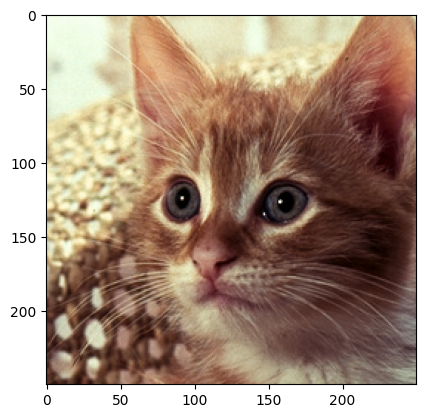

In [43]:
left = 150
right = 400
crop_horizontal = crop_top[:, left:right,:]
plt.imshow(crop_horizontal)
plt.show()

You can crop the PIL image using the crop() method, using the parameters from above Set the cropping area with box=(left, upper, right, lower).

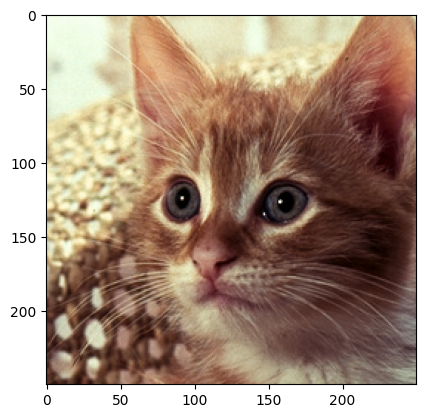

In [45]:
image = Image.open("cat.png")
image_crop = image.crop((left, upper, right, lower))
plt.imshow(image_crop)
plt.show()

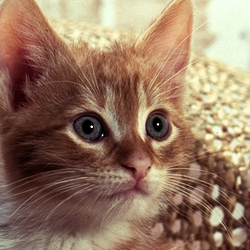

In [50]:
#image_crop = image_crop.transpose(0)

image_crop = image_crop.transpose(Image.FLIP_LEFT_RIGHT)
image_crop

## Changing Specific Image Pixels

We can change specific image pixels using  array indexing; for example, we can set  all the green and blue channels in the original image we cropped to zero:


In [52]:
array_sq = np.copy(array)
array_sq[upper:lower, left:right, 1:3] = 0

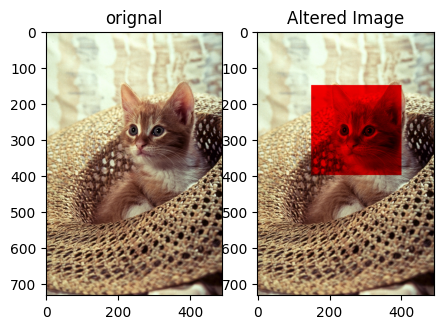

In [53]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(array)
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(array_sq)
plt.title("Altered Image")
plt.show()

We can also use the ImageDraw module from PIL library, which provides simple 2D graphics for Image objects

In [54]:
from PIL import ImageDraw

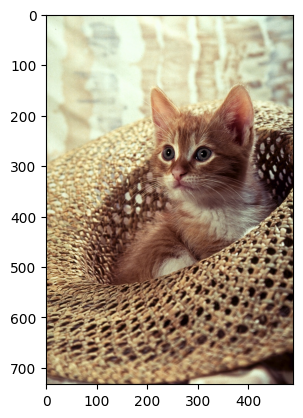

In [58]:
image_draw = image.copy()
plt.imshow(image_draw)
plt.show()


The draw constructor creates an object that can be used to draw in the given image. The input im is the image we would like to draw in.

In [61]:
image_fn = ImageDraw.Draw(im=image_draw)


Whatever method we apply to the object image_fn, will change the image object image_draw.

We can draw a rectangle using the rectangle function, two important parameters include: xy – the coordinates bounding box and fill – Color of the rectangle.

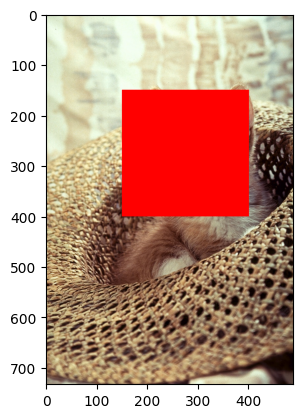

In [65]:
shape = [left, upper, right, lower]
image_fn.rectangle(xy=shape, fill='red')
plt.imshow(image_draw)
plt.show()


In [66]:
from PIL import ImageFont

We use the text method to place the text on the image. The parameters include xy (the top-left anchor coordinates of the text), the parameter text (the text to be drawn), and fill (the color to use for the text).

In [73]:
image_fn.text(xy=(0,0),text="box the cat", fill=(0,0,0))

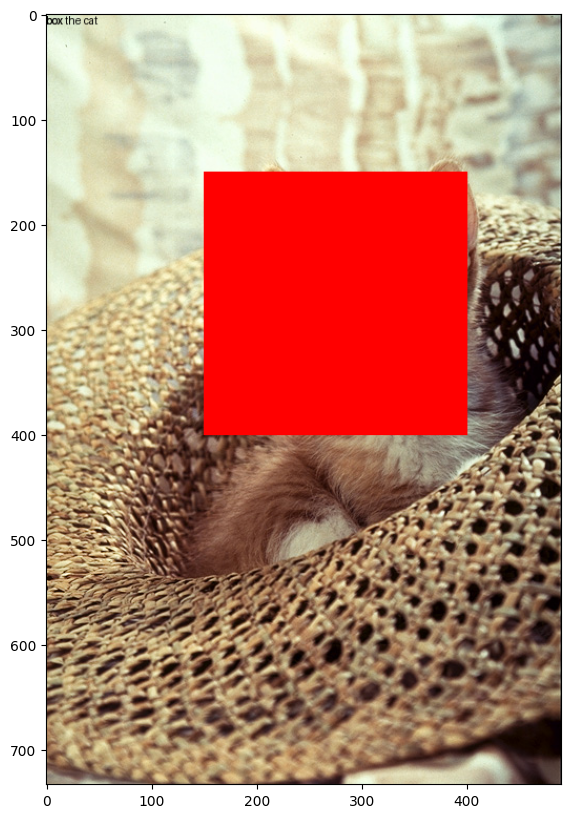

In [74]:
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()

We can overlay or paste one image over another by reassigning the pixel for one array to the next. Consider the following image array:

In [75]:
image_lenna = Image.open("lenna.png")
array_lenna = np.array(image_lenna)

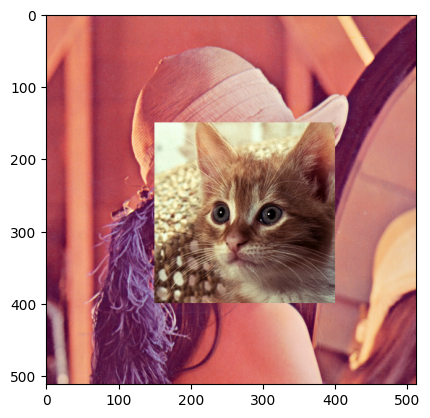

In [76]:
array_lenna[upper:lower,left:right,:]=array[upper:lower,left:right,:]
plt.imshow(array_lenna)
plt.show()

In the same manner, the paste() method allows you to overlay one image over another, with the input being the image you would like to overlay. The parameter box is the left and upper coordinate of the image:

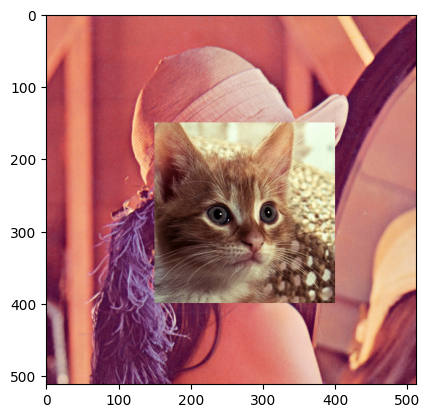

In [77]:
image_lenna.paste(image_crop, box=(left,upper))
plt.imshow(image_lenna)
plt.show()

### Question 1:
Use the image `baboon.png` from this lab or take any image you like.

Open the image and create a PIL Image object called `im`, flip `im` and create an image called `im_flip`. Mirror `im` and create an image called `im_mirror`. Finally, plot both images.


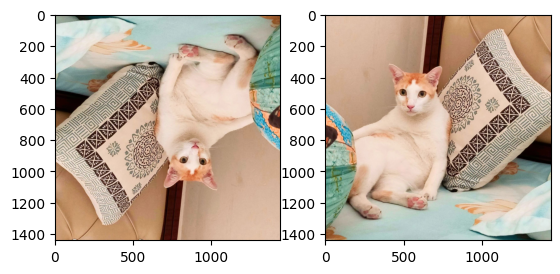

In [83]:
im = Image.open("Ador Bhuna.jpg")
#im_flip = im.transpose(0)

im_flip = ImageOps.flip(im)
im_mirror = ImageOps.mirror(im)

plt.subplot(121)
plt.imshow(im_flip)

plt.subplot(122)
plt.imshow(im_mirror)
plt.show()